In [4]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns # Where we get Iris Dataset from
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
# Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Prepare the training set
# Independent set "X"
# X = feature values, get all columns except the last column
X = data.iloc[:, :-1] # gets all the rows, and then all columns except the last column

#y = target values, we only want the last column of the data frame
y = data.iloc[:, -1] # gets all rows, and gets only the last column

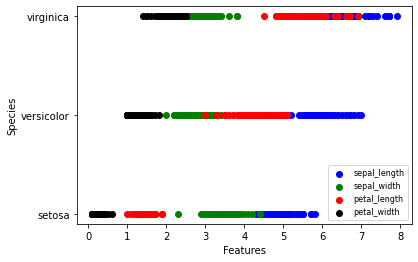

In [14]:
# Plot the data. Plot the relation of each feature with each species

plt.xlabel('Features')
plt.ylabel('Species')

# Now let's give it the data
pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='blue', Label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='green', Label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='red', Label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='black', Label='petal_width')

plt.legend(loc = 4, prop={'size':8})
plt.show()



In [15]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # train_test_split('independent dataset', 'dependent dataset')

In [16]:
# Train the model. "fit" means to train
model = LogisticRegression()
model.fit(x_train, y_train) # Training the model

C:\Users\denny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Test the model
predictions = model.predict(x_test) 
# print(predictions)

# print(y_test)

# Check the precision, recall, f1-score
print(classification_report(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Automatically created module for IPython interactive environment


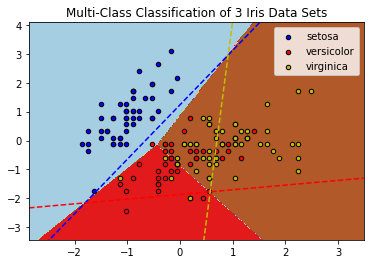

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Multi-Class Classification of 3 Iris Data Sets")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()